# Задание 1. Готовим обучающую выборку

Нам требуется подготовить модель, которая разделяет фотографии на две категории, в зависимости от того, что на них нарисовано. Будем использовать сверточную нейросеть для этого.

У нас есть набор фотографий кошек и собак. Подготовим нейронку, которая будет уметь классифицировать фотографии на те, на которых изображена кошка, и те, на которых изображена собака.

Структура папки с фотографиями следующая:
```
dataset
|- cats
|- dogs
```
Разделите изображения на тренировочную и тестовую выборки в соотношении 80/20. Сохраните их в соответствии со следующей структурой папок:
```
dataset/animals
|- train
|  |- cats
|  |- dogs
|
|- test
|  |- cats
|  |- dogs
```
Сымитируем ситуацию, когда нам регулярно приходят новые изображения, и нам нужно дообучать модель. Поэтому для раскладывания картинок по папкам **нужно написать функцию**. Очищать исходные папки не нужно.

In [65]:
import os
import shutil

def train_test_split_images(str):
    """функция принимает аргумент - адрес корневой папку с изображениями,
    берет изображения из подпапок этой папки и раскладывает по папкам
    из описания задания"""
    try:
        dir = os.listdir(str)
        animals = dir.index('animals')
    except FileNotFoundError:
        print('Системе не удается найти указанный путь:', str)
        return -1
    except ValueError:
        os.mkdir(str + '\\animals')
    try:
        os.mkdir(str + '\\animals\\test')
    except FileExistsError:
        animals_dirs = ''
    try:
        os.mkdir(str + '\\animals\\train')
    except FileExistsError:
        animals_dirs = ''
    try:
        cats = 0
        cats = dir.index('cats')
        try:
            os.mkdir(str + '\\animals\\test\\cats')
        except FileExistsError:
            animals_dirs = ''
        try:
            os.mkdir(str + '\\animals\\train\\cats')
        except FileExistsError:
            animals_dirs = ''
        dir_cats = os.listdir(str + '\\cats')
        if len(dir_cats) == 0:
            dir_cats.index('12312dfsdfsdfsdfsdf')
        for i in range(0,len(dir_cats)):
            if i < len(dir_cats) * 0.8:
                shutil.copy(str + '\\cats\\' + dir_cats[i], str + '\\animals\\train\\cats\\')
            else:
                shutil.copy(str + '\\cats\\' + dir_cats[i], str + '\\animals\\test\\cats\\')
    except ValueError:
        print('Нет данных для обучения категории cats')
    try:
        dogs = 0
        dogs = dir.index('dogs')
        try:
            os.mkdir(str + '\\animals\\test\\dogs')
        except FileExistsError:
            animals_dirs = ''
        try:
            os.mkdir(str + '\\animals\\train\\dogs')
        except FileExistsError:
            animals_dirs = ''
        dir_dogs = os.listdir(str + '\\dogs')
        if len(dir_dogs) == 0:
            dir_dogs.index('12312dfsdfsdfsdfsdf')
        for i in range(0,len(dir_dogs)):
            if i < len(dir_dogs) * 0.8:
                shutil.copy(str + '\\dogs\\' + dir_dogs[i], str + '\\animals\\train\\dogs\\' + dir_dogs[i])
            else:
                shutil.copy(str + '\\dogs\\' + dir_dogs[i], str + '\\animals\\test\\dogs\\' + dir_dogs[i])
    except ValueError:
        print('Нет данных для обучения категории dogs')
    if cats == 0 and dogs == 0:
        return -1
    return 0
print(train_test_split_images('C:\pythonDS\d08\datasets'))

0


# Задание 2. Переиспользование топологий нейронных сетей

Построим модель. Ваша задача - найти в интернете архитектуру VGG19 и описать нейросеть по этой архитектуре через keras. Рекомендую ориентироваться на архитектуру, описанную в официальном репозитории кераса на github.com. Ссылку на него здесь не приведена сознательно, поскольку большая часть работы программиста заключается в умении гуглить, и этот навык лучше тренировать сразу.

In [170]:
import numpy as np
np.random.seed(123)  # для воспроизводимости
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Dense
from keras.utils import np_utils
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# размер для ResNet'a
img_width, img_height = 224, 224

# корневая папка
root_dir = r'C:\\pythonDS\\d08\\datasets\\'  # введите сюда адрес корневой папки
# папка с тренировочными картинками
train_dir = os.path.join(root_dir, 'animals', 'train')
# и папка с тестовыми
test_dir = os.path.join(root_dir, 'animals', 'test')
# размер батча
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # приведем значения пикселей к 0-1
    shear_range=0.2,   # максимальный угол поворота изображений
    zoom_range=0.2,    # максимальное приближение изображений
    horizontal_flip=True)  # используем повороты изображений для обогащения обучающей выборки

test_datagen = ImageDataGenerator(rescale=1. / 255)  # замер качества мы должны проводить на оригинальных изображениях, 
                                                     # поэтому тестовую выборку мы не будем вращать и приближать
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [171]:
def vlg_34():
    from keras import backend
    from keras.applications import imagenet_utils
    from keras.engine import training
    from keras.layers import VersionAwareLayers
    from keras.utils import data_utils
    layers = VersionAwareLayers()
    input_shape = imagenet_utils.obtain_input_shape(
        None,default_size=224,min_size=32,
        data_format=backend.image_data_format(),
        require_flatten=True,weights='imagenet')
    img_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    imagenet_utils.validate_activation('softmax', 'imagenet')
    x = layers.Dense(1000, activation='softmax',
                        name='predictions')(x)
    model2 = training.Model(img_input, x, name='vgg19')
    model2.load_weights(data_utils.get_file(
            'vgg19_weights_tf_dim_ordering_tf_kernels.h5',
            'https://storage.googleapis.com/tensorflow/keras-applications/'
                'vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5',
            cache_subdir='models',
            file_hash='cbe5617147190e668d6c5d5026f83318'))
    return model2
model = Sequential()
model.add(vlg_34())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
model.save_weights(os.path.join(root_dir,'vgg19_weights_tf_dim_ordering_tf_kernels.h5'))

Подгрузим веса модели, подобранные экспертами до нас. Если на предыдущем этапе вы создали неправильную архитектуру, следующая ячейка упадет с ошибкой.

In [172]:
model.load_weights(os.path.join(root_dir, 'vgg19_weights_tf_dim_ordering_tf_kernels.h5'))

# Задание 3. Обучение сети

Обучите 20 эпох сети, замеряя качество после каждой эпохи. Постройте график зависимости качества классификации от количества эпох сети. На какой эпохе качество модели превысит 0.45?

In [173]:
log = model.fit(
    train_generator,
    steps_per_epoch=250 // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps= 250 // batch_size,
    workers=3)
acc_train = log.history['accuracy']
print(acc_train)
acc_test = log.history['val_accuracy']
print(acc_test)

Epoch 1/20
15/15 [==============================] - 381s 26s/step - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 2/20
15/15 [==============================] - 391s 26s/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6925 - val_accuracy: 0.5083
Epoch 3/20
15/15 [==============================] - 389s 26s/step - loss: 0.6928 - accuracy: 0.4958 - val_loss: 0.6928 - val_accuracy: 0.5667
Epoch 4/20
15/15 [==============================] - 385s 26s/step - loss: 0.6926 - accuracy: 0.5375 - val_loss: 0.6924 - val_accuracy: 0.5625
Epoch 5/20
15/15 [==============================] - 388s 26s/step - loss: 0.6921 - accuracy: 0.6083 - val_loss: 0.6922 - val_accuracy: 0.5708
Epoch 6/20
15/15 [==============================] - 384s 26s/step - loss: 0.6916 - accuracy: 0.5792 - val_loss: 0.6921 - val_accuracy: 0.5625
Epoch 7/20
15/15 [==============================] - 388s 26s/step - loss: 0.6890 - accuracy: 0.6417 - val_loss: 0.6905 - val_accuracy: 0.5542
Epoch 

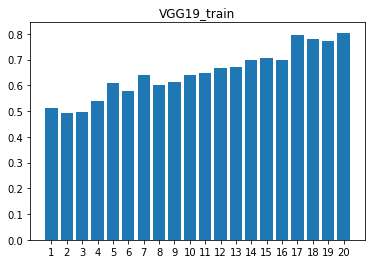

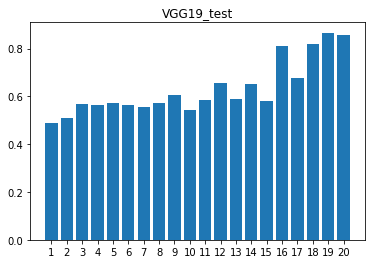

In [174]:
import matplotlib.pyplot as plt
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_train)
plt.title('VGG19_train')
plt.show()
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_test)
plt.title('VGG19_test')
plt.show()

# Задание 4. Готовые архитектуры нейросетей

В keras описаны некоторые популярные архитектуры нейросетей. При этом их можно использовать в качестве одного из слоев другой нейросети. В частности, есть готовый класс, в котором описана VGG19 с теми весами, которые мы подгружали из файла (ImageNet).
Изучите, какие нейросети также популярны для классификации изображений. Выберите 2 архитектуры, постройте модели с их использованием, выберите наилучшую по качеству на 20 эпохах и лучшую по скорости обучения.

In [175]:
from keras.applications.resnet_v2 import ResNet152V2
m = Sequential()
m.add(ResNet152V2(weights='imagenet'))
m.add(Dense(2, activation='softmax')) 
m.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
m.save_weights(os.path.join(root_dir,'resnet_weights_tf_dim_ordering_tf_kernels.h5'))

In [176]:
log1 = m.fit(
    train_generator,
    steps_per_epoch=250 // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps= 250 // batch_size,
    workers=3)
acc_train2 = log.history['accuracy']
print(acc_train2)
acc_test2 = log.history['val_accuracy']
print(acc_test2)

Epoch 1/20
15/15 [==============================] - 325s 21s/step - loss: 0.6915 - accuracy: 0.6375 - val_loss: 0.6944 - val_accuracy: 0.4792
Epoch 2/20
15/15 [==============================] - 301s 20s/step - loss: 0.6920 - accuracy: 0.5792 - val_loss: 0.6926 - val_accuracy: 0.5250
Epoch 3/20
15/15 [==============================] - 305s 21s/step - loss: 0.6913 - accuracy: 0.6125 - val_loss: 0.6922 - val_accuracy: 0.5458
Epoch 4/20
15/15 [==============================] - 303s 20s/step - loss: 0.6919 - accuracy: 0.5417 - val_loss: 0.6910 - val_accuracy: 0.5750
Epoch 5/20
15/15 [==============================] - 300s 20s/step - loss: 0.6912 - accuracy: 0.5458 - val_loss: 0.6909 - val_accuracy: 0.4500
Epoch 6/20
15/15 [==============================] - 297s 20s/step - loss: 0.6920 - accuracy: 0.4625 - val_loss: 0.6893 - val_accuracy: 0.5333
Epoch 7/20
15/15 [==============================] - 301s 20s/step - loss: 0.6917 - accuracy: 0.4875 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 

In [185]:
acc_train2 = log1.history['accuracy']
acc_test2 = log1.history['val_accuracy']
print(acc_train2)
print(acc_test2)

[0.637499988079071, 0.5791666507720947, 0.612500011920929, 0.5416666865348816, 0.5458333492279053, 0.4625000059604645, 0.48750001192092896, 0.6208333373069763, 0.6083333492279053, 0.5583333373069763, 0.5, 0.6833333373069763, 0.6791666746139526, 0.7124999761581421, 0.637499988079071, 0.675000011920929, 0.737500011920929, 0.6666666865348816, 0.6458333134651184, 0.6333333253860474]
[0.4791666567325592, 0.5249999761581421, 0.5458333492279053, 0.574999988079071, 0.44999998807907104, 0.5333333611488342, 0.6000000238418579, 0.5708333253860474, 0.5874999761581421, 0.5291666388511658, 0.5583333373069763, 0.6625000238418579, 0.625, 0.6791666746139526, 0.6458333134651184, 0.6625000238418579, 0.6708333492279053, 0.6708333492279053, 0.6833333373069763, 0.7083333134651184]


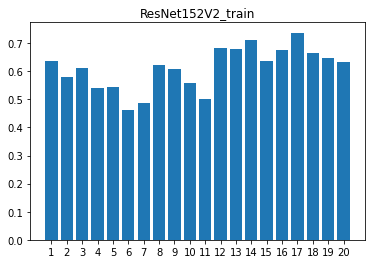

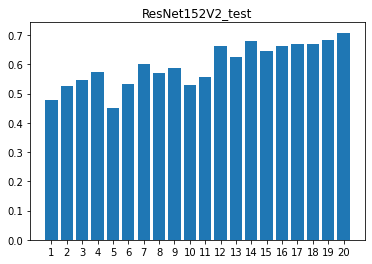

In [186]:
import matplotlib.pyplot as plt
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_train2)
plt.title('ResNet152V2_train')
plt.show()
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_test2)
plt.title('ResNet152V2_test')
plt.show()

In [178]:
from keras.applications.densenet import DenseNet201
m2 = Sequential()
m2.add(DenseNet201(weights='imagenet'))
m2.add(Dense(2, activation='softmax')) 
m2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
m2.save_weights(os.path.join(root_dir,'densenet201_weights_tf_dim_ordering_tf_kernels.h5'))

In [179]:
log2 = m2.fit(
    train_generator,
    steps_per_epoch=250 // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps= 250 // batch_size,
    workers=3)
acc_train3 = log.history['accuracy']
print(acc_train3)
acc_test3 = log.history['val_accuracy']
print(acc_test3)

Epoch 1/20
15/15 [==============================] - 229s 14s/step - loss: 0.6911 - accuracy: 0.5583 - val_loss: 0.6941 - val_accuracy: 0.4542
Epoch 2/20
15/15 [==============================] - 205s 14s/step - loss: 0.6914 - accuracy: 0.5667 - val_loss: 0.6928 - val_accuracy: 0.4750
Epoch 3/20
15/15 [==============================] - 205s 14s/step - loss: 0.6894 - accuracy: 0.6667 - val_loss: 0.6921 - val_accuracy: 0.5583
Epoch 4/20
15/15 [==============================] - 206s 14s/step - loss: 0.6900 - accuracy: 0.6333 - val_loss: 0.6922 - val_accuracy: 0.5458
Epoch 5/20
15/15 [==============================] - 205s 14s/step - loss: 0.6885 - accuracy: 0.6667 - val_loss: 0.6913 - val_accuracy: 0.5708
Epoch 6/20
15/15 [==============================] - 206s 14s/step - loss: 0.6875 - accuracy: 0.6125 - val_loss: 0.6913 - val_accuracy: 0.5542
Epoch 7/20
15/15 [==============================] - 208s 14s/step - loss: 0.6893 - accuracy: 0.5875 - val_loss: 0.6885 - val_accuracy: 0.6417
Epoch 

In [181]:
acc_train3 = log2.history['accuracy']
acc_test3 = log2.history['val_accuracy']
print(acc_train3)
print(acc_test3)

[0.5583333373069763, 0.5666666626930237, 0.6666666865348816, 0.6333333253860474, 0.6666666865348816, 0.612500011920929, 0.5874999761581421, 0.625, 0.737500011920929, 0.7458333373069763, 0.6625000238418579, 0.5833333134651184, 0.5583333373069763, 0.7291666865348816, 0.7875000238418579, 0.8208333253860474, 0.8416666388511658, 0.7166666388511658, 0.5791666507720947, 0.5666666626930237]
[0.4541666805744171, 0.4749999940395355, 0.5583333373069763, 0.5458333492279053, 0.5708333253860474, 0.5541666746139526, 0.6416666507720947, 0.6416666507720947, 0.637499988079071, 0.6333333253860474, 0.5416666865348816, 0.42916667461395264, 0.6166666746139526, 0.7250000238418579, 0.7583333253860474, 0.737500011920929, 0.7041666507720947, 0.5833333134651184, 0.512499988079071, 0.5041666626930237]


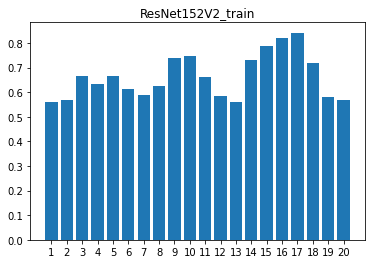

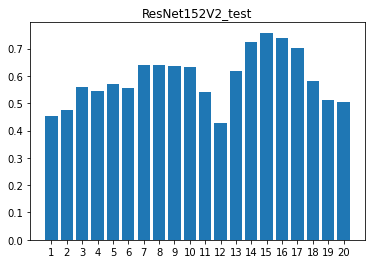

In [182]:
import matplotlib.pyplot as plt
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_train3)
plt.title('ResNet152V2_train')
plt.show()
plt.bar(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], acc_test3)
plt.title('ResNet152V2_test')
plt.show()